In [175]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

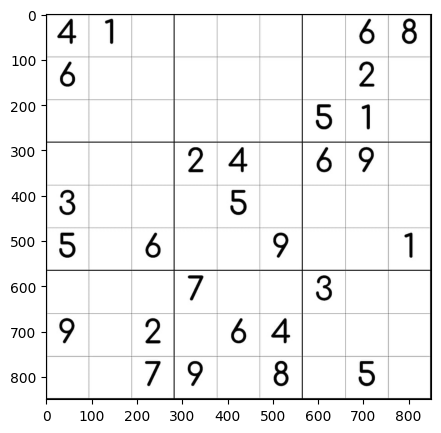

In [330]:
img=cv2.imread("../img/sudoku.jpg")
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img[..., ::-1])
plt.show()

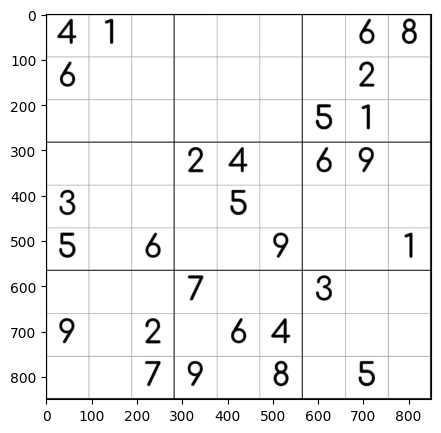

In [331]:
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgGray,cmap="gray")
plt.show()

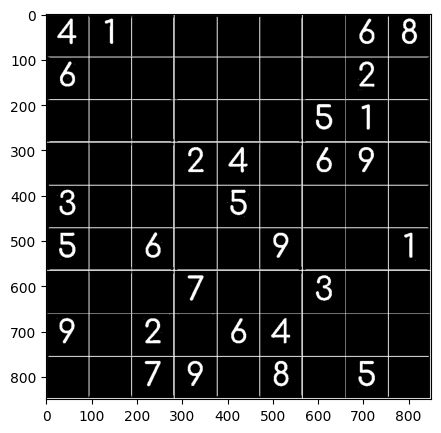

In [332]:
imgGrayInv=cv2.bitwise_not(imgGray)
imgThresh=cv2.adaptiveThreshold(imgGrayInv,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgThresh,cmap="gray")
plt.show()

In [333]:
horizontal=np.copy(imgThresh)
vertical=np.copy(imgThresh)

In [334]:
cols=horizontal.shape[1]
horizontal_size=cols//10

In [335]:
horizontalStructure=cv2.getStructuringElement(cv2.MORPH_RECT,(horizontal_size,1))

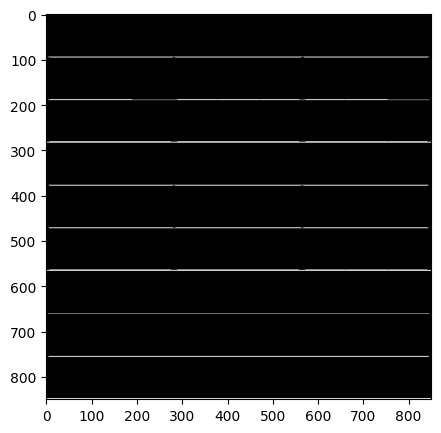

In [336]:
horizontal=cv2.erode(horizontal,horizontalStructure)
horizontal=cv2.dilate(horizontal,horizontalStructure)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(horizontal,cmap="gray")
plt.show()

In [337]:
rows=vertical.shape[1]
vertical_size=cols//10

In [338]:
verticalStructure=cv2.getStructuringElement(cv2.MORPH_RECT,(1,vertical_size))

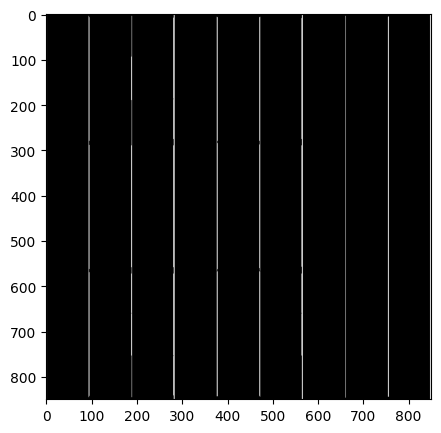

In [339]:
vertical=cv2.erode(vertical,verticalStructure)
vertical=cv2.dilate(vertical,verticalStructure)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(vertical,cmap="gray")
plt.show()

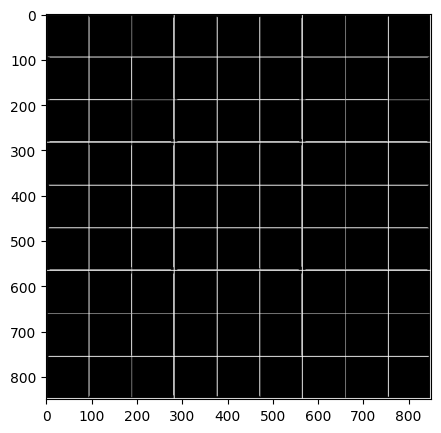

In [340]:
concatenate=cv2.bitwise_or(vertical,horizontal)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(concatenate,cmap="gray")
plt.show()

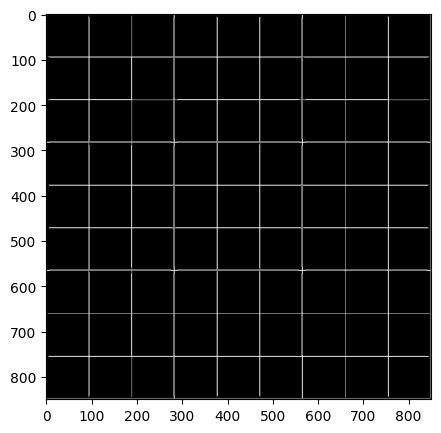

In [352]:
edges=cv2.adaptiveThreshold(concatenate,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,-2)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(edges,cmap="gray")
plt.show()

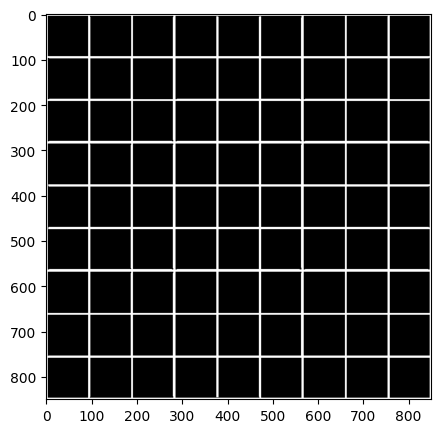

In [353]:
kernel=np.ones((4,4),np.uint8)
edges=cv2.dilate(edges,kernel)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(edges,cmap="gray")
plt.show()

In [354]:
imgSmooth=cv2.blur(edges,(2,2))

In [355]:
cnts,hierarchy=cv2.findContours(image=imgSmooth,mode=cv2.RETR_TREE,method=cv2.CHAIN_APPROX_NONE)
newImage=imgGray.copy()
cv2.drawContours(image=newImage,contours=cnts,contourIdx=-1,color=(0,0,255),thickness=2,lineType=cv2.LINE_AA)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 63, ..., 90,  0,  0],
       ...,
       [ 0,  0, 79, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [356]:
from imutils import contours
cnts,_=contours.sort_contours(cnts,method="left-to-right")
cnts,_=contours.sort_contours(cnts,method="top-to-bottom")

81


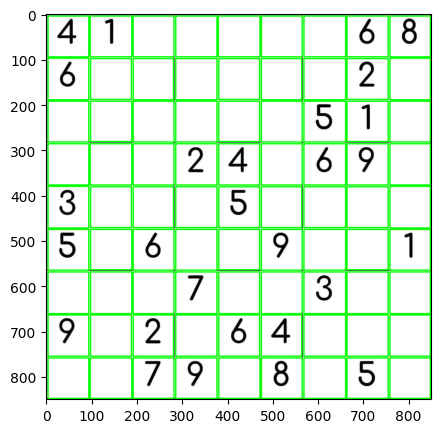

In [358]:
imageCopy=img.copy()
count=0
for c in cnts:
    
    if(cv2.contourArea(c)>1000 and cv2.contourArea(c)<10000):
        count=count+1
        rect=cv2.boundingRect(c)
        x,y,w,h=rect
        cv2.rectangle(imageCopy,(x,y),(x+w,y+h),(0,255,0),2)
print(count)
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imageCopy[..., ::-1])
plt.show()        

In [359]:
import pytesseract as pyt
import os

pyt.pytesseract.tesseract_cmd="C:\\Users\\Administrator\\AppData\\Local\\Tesseract-OCR\\tesseract.exe"

def get_num(img):
    return pyt.image_to_string(img,config=r'--oem 3 --psm 6 outbase digits')

In [362]:
imageCopy=img.copy()
count=0
num=[]
for c in cnts:
    if(cv2.contourArea(c)>1000 and cv2.contourArea(c)<10000):
        count=count+1
        rect=cv2.boundingRect(c)
        x,y,w,h=rect
        array=np.array(imageCopy[y:y+h,x:x+w])
        num.append(get_num(array))

In [363]:
def divide_chunks(l,n):
    for i in range(0,len(l),n):
        yield l[i:i+n]
n=9
matrix=list(divide_chunks(num,n))
matrix

[['4\n', '1\n', '', '', '', '', '', '6\n', '8\n'],
 ['6\n', '', '', '', '', '', '', '', '2\n'],
 ['', '', '', '', '', '', '', '1\n', ''],
 ['', '', '', '2\n', '4\n', '', '6\n', '9\n', ''],
 ['3\n', '', '', '', '', '', '', '', ''],
 ['', '', '6\n', '', '', '9\n', '', '', '1\n'],
 ['', '', '', '7\n', '', '', '3\n', '', ''],
 ['9\n', '', '2\n', '', '6\n', '4\n', '', '', ''],
 ['', '', '7\n', '9\n', '', '8\n', '', '', '']]

In [364]:
import copy

mat = copy.deepcopy(matrix)
for n in mat:
    for j, i in enumerate(n):
        if i == '' or i=='-':
            n[j] = '0'
        elif len(i) > 0:  # Boş değilse
            n[j] = i[0]

mat

[['4', '1', '0', '0', '0', '0', '0', '6', '8'],
 ['6', '0', '0', '0', '0', '0', '0', '0', '2'],
 ['0', '0', '0', '0', '0', '0', '0', '1', '0'],
 ['0', '0', '0', '2', '4', '0', '6', '9', '0'],
 ['3', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '6', '0', '0', '9', '0', '0', '1'],
 ['0', '0', '0', '7', '0', '0', '3', '0', '0'],
 ['9', '0', '2', '0', '6', '4', '0', '0', '0'],
 ['0', '0', '7', '9', '0', '8', '0', '0', '0']]

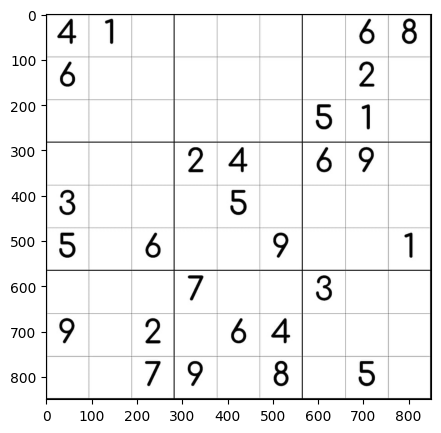

In [367]:
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imageCopy[..., ::-1])
plt.show()   

In [368]:
for row in mat:
    for i,j in enumerate(row):
        row[i]=int(j)
mat

[[4, 1, 0, 0, 0, 0, 0, 6, 8],
 [6, 0, 0, 0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 2, 4, 0, 6, 9, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 6, 0, 0, 9, 0, 0, 1],
 [0, 0, 0, 7, 0, 0, 3, 0, 0],
 [9, 0, 2, 0, 6, 4, 0, 0, 0],
 [0, 0, 7, 9, 0, 8, 0, 0, 0]]

In [369]:
grid=copy.deepcopy(mat)

In [370]:
M = 9

def puzzle(a):
    for i in range(M):
        for j in range(M):
            print(a[i][j], end=" ")
        print()

def solve(grid, row, col, num):
    for x in range(M):
        if grid[row][x] == num:
            return False
    for x in range(M):
        if grid[x][col] == num:
            return False
    startRow = row - row % 3
    startCol = col - col % 3
    for i in range(3):
        for j in range(3):
            if grid[i + startRow][j + startCol] == num:
                return False
    return True

def Sudoku(grid, row, col):
    if row == M:
        return True
    if col == M:
        return Sudoku(grid, row + 1, 0)
    if grid[row][col] > 0:
        return Sudoku(grid, row, col + 1)
    for num in range(1, M + 1):
        if solve(grid, row, col, num):
            grid[row][col] = num
            if Sudoku(grid, row, col + 1):
                return True
        grid[row][col] = 0
    return False

if Sudoku(grid, 0, 0):
    print("Solution found:")
    puzzle(grid)
else:
    print("There is no solution")

Solution found:
4 1 3 5 2 7 9 6 8 
6 5 8 4 9 1 7 3 2 
7 2 9 6 8 3 4 1 5 
8 7 1 2 4 5 6 9 3 
3 9 5 1 7 6 8 2 4 
2 4 6 8 3 9 5 7 1 
1 6 4 7 5 2 3 8 9 
9 8 2 3 6 4 1 5 7 
5 3 7 9 1 8 2 4 6 


In [371]:
bound=[]
for c in cnts:
    if(cv2.contourArea(c)>1000 and cv2.contourArea(c)<50000):
        count=count+1
        rect=cv2.boundingRect(c)
        bound.append(rect)

In [372]:
n=9
bound=list(divide_chunks(bound,n))
bound

[[(4, 4, 90, 90),
  (97, 4, 92, 90),
  (192, 4, 90, 90),
  (286, 4, 91, 90),
  (380, 4, 92, 90),
  (475, 4, 90, 90),
  (569, 4, 92, 90),
  (664, 4, 91, 90),
  (759, 4, 89, 90)],
 [(4, 97, 90, 92),
  (759, 97, 89, 92),
  (98, 98, 90, 90),
  (192, 98, 89, 91),
  (286, 98, 91, 91),
  (381, 98, 90, 90),
  (475, 98, 89, 91),
  (569, 98, 92, 91),
  (664, 98, 91, 90)],
 [(4, 192, 90, 90),
  (98, 192, 91, 89),
  (192, 192, 90, 90),
  (286, 192, 91, 90),
  (381, 192, 90, 89),
  (475, 192, 90, 90),
  (569, 192, 92, 90),
  (664, 192, 91, 89),
  (759, 192, 89, 90)],
 [(4, 286, 90, 91),
  (97, 286, 92, 91),
  (192, 286, 90, 91),
  (286, 286, 91, 91),
  (381, 286, 90, 91),
  (475, 286, 90, 91),
  (569, 286, 92, 91),
  (664, 286, 91, 91),
  (759, 286, 89, 91)],
 [(4, 380, 90, 92),
  (759, 380, 89, 92),
  (98, 381, 90, 90),
  (192, 381, 89, 90),
  (286, 381, 91, 90),
  (381, 381, 90, 90),
  (475, 381, 89, 90),
  (569, 381, 92, 90),
  (664, 381, 91, 90)],
 [(4, 475, 90, 90),
  (98, 475, 91, 89),
  (192

In [373]:
imageCopy=img.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 3
font_thickness = 2
color = (0, 0, 255)  # Kırmızı renk

for i, m in enumerate(mat):
    for j, n in enumerate(m):
        if mat[i][j] != grid[i][j]:
            x, y, w, h = bound[i][j]
            text = str(grid[i][j])
            
            # Metin boyutunu hesapla
            (text_width, text_height), _ = cv2.getTextSize(text, font, font_scale, font_thickness)
            
            # Metni ortalamak için gerekli koordinatları hesapla
            text_x = x + (w - text_width) // 2
            text_y = y + (h + text_height) // 2
            
            # Metni çiz
            cv2.putText(imageCopy, text, (text_x, text_y), font, font_scale, color, font_thickness)

mat        

[[4, 1, 0, 0, 0, 0, 0, 6, 8],
 [6, 0, 0, 0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 2, 4, 0, 6, 9, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 6, 0, 0, 9, 0, 0, 1],
 [0, 0, 0, 7, 0, 0, 3, 0, 0],
 [9, 0, 2, 0, 6, 4, 0, 0, 0],
 [0, 0, 7, 9, 0, 8, 0, 0, 0]]

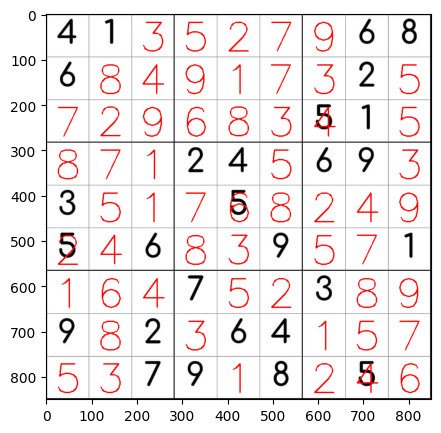

In [374]:
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imageCopy[..., ::-1])
plt.show()   